# 순차적 모델

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# 위 두 코드는 동일한 모델을 만듦

In [2]:
# 아직은 가중치가 없음
model.weights

[]

In [3]:
# summary는 호출되지만 가중치가 없음
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 모델 빌드 해야 가중치가 생성됨 
model.build(input_shape=(None, 3))
model.weights


[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

In [5]:
# 혹은 input_shape (모델 입력 크기)를 미리 지정하면 됨
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 이름 지정도 가능 
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

# 함수형 API

In [7]:
# 간단한 예시 
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

# input은 batch 차원이 가변적 (None), 각 샘플의 크기가 (3,)인 2D 텐서를 뜻함
print(inputs.shape), print(inputs.dtype)

(None, 3)
float32


(None, None)

In [8]:
# features는 batch 차원이 가변적이지만, 각 샘플의 크기가 (64,)인 2D 텐서를 뜻함
print(features.shape), print(features.dtype)

(None, 64)
float32


(None, None)

In [9]:
# 다중 입력, 다중 출력 모델
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [10]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2680 - loss: 40.4322 - priority_mean_absolute_error: 0.4712
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.5777 - loss: 24.8971 - priority_mean_absolute_error: 0.4989 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [11]:
# 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기

model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2537 - loss: 45.6563 - priority_mean_absolute_error: 0.4800 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - department_accuracy: 0.1141 - loss: 76.3416 - priority_mean_absolute_error: 0.4989 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


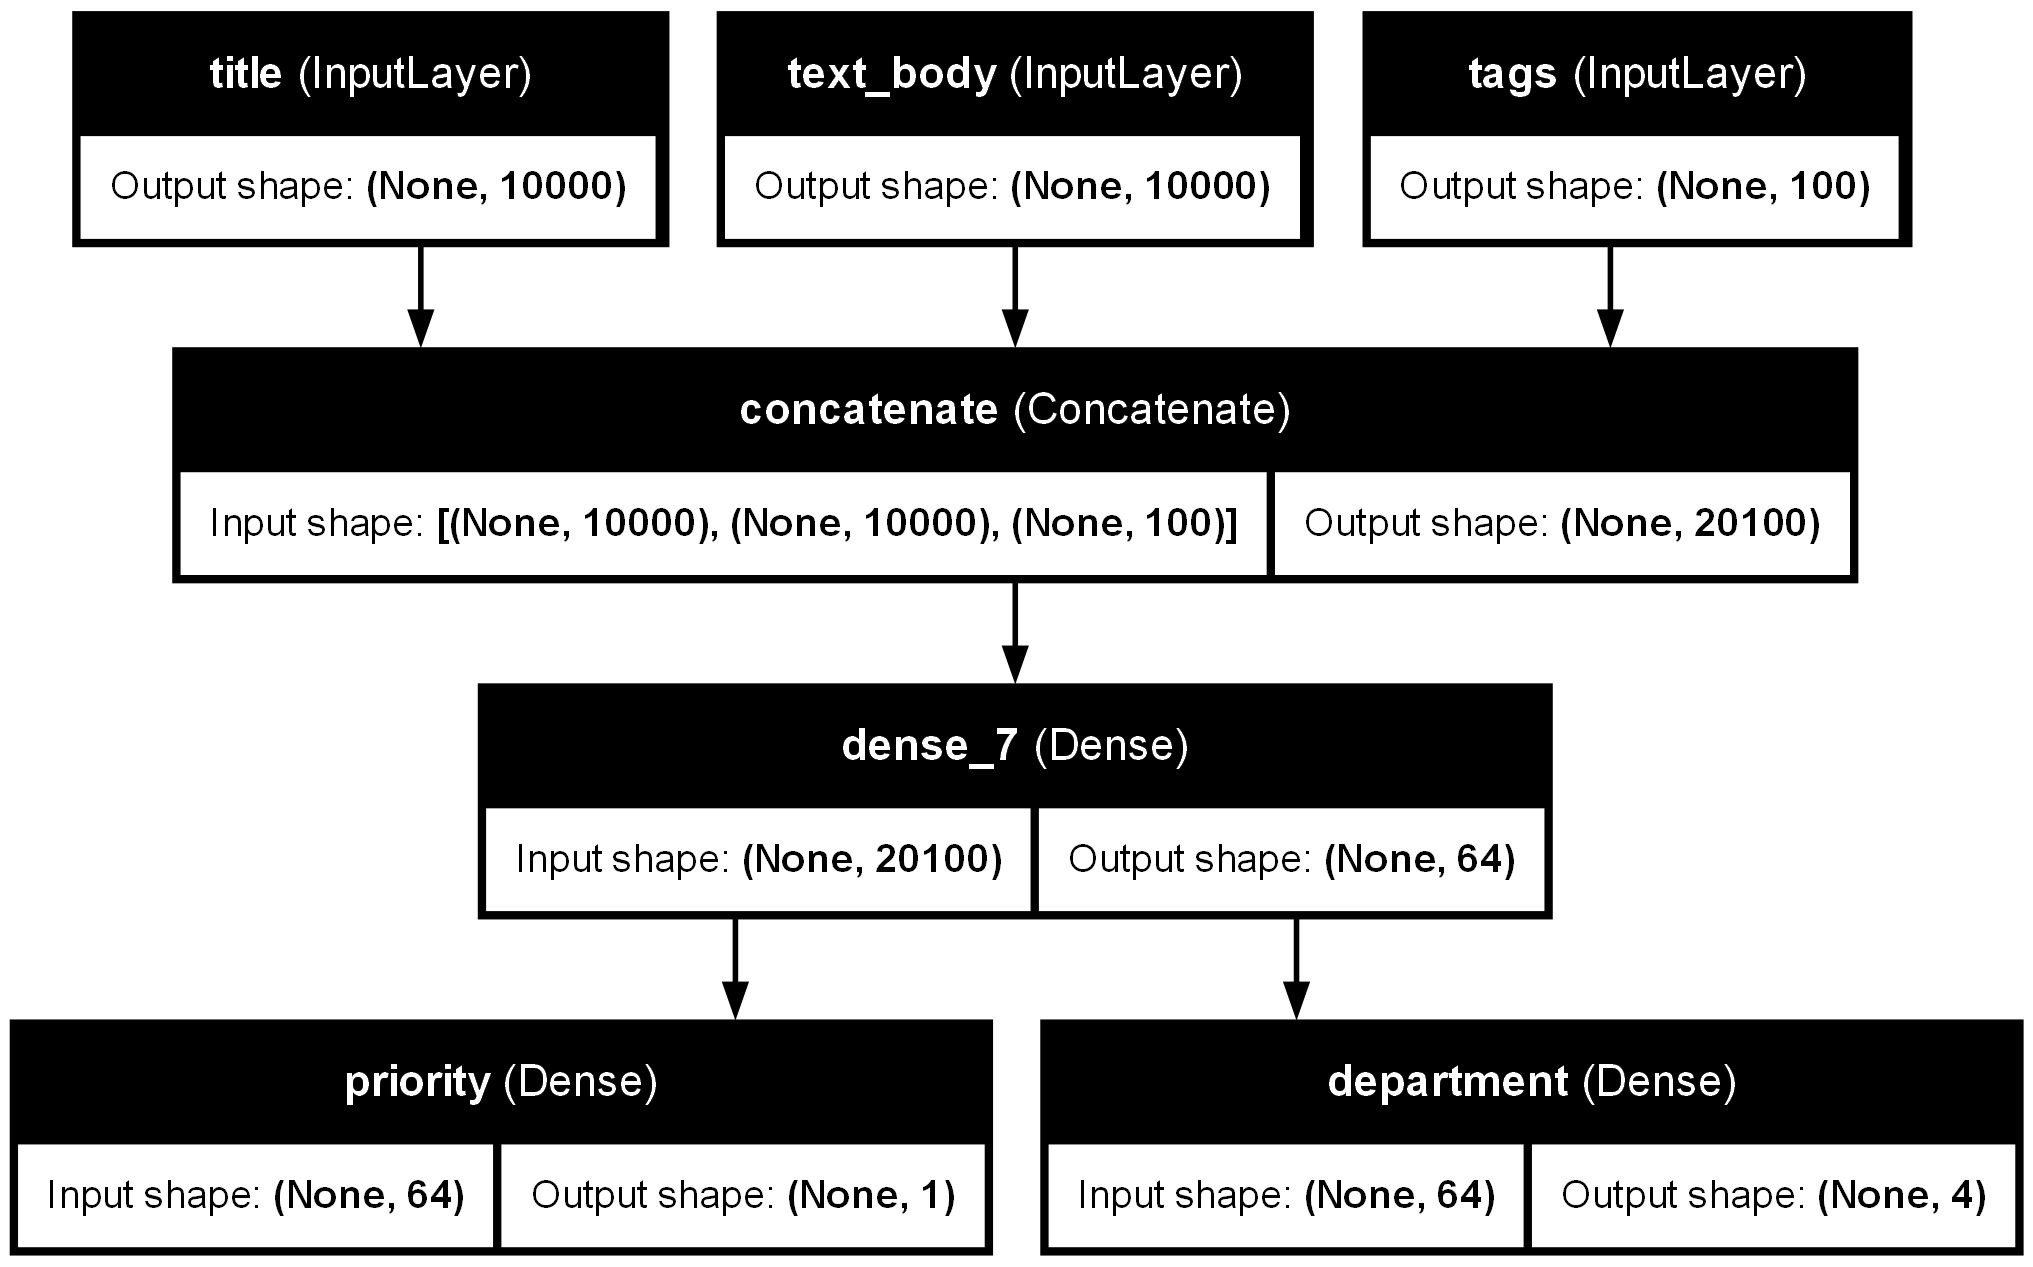

In [12]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True, show_layer_names=True)

In [13]:
# 레이어 확인
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [14]:
# 레이어 input 확인
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [15]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_10>

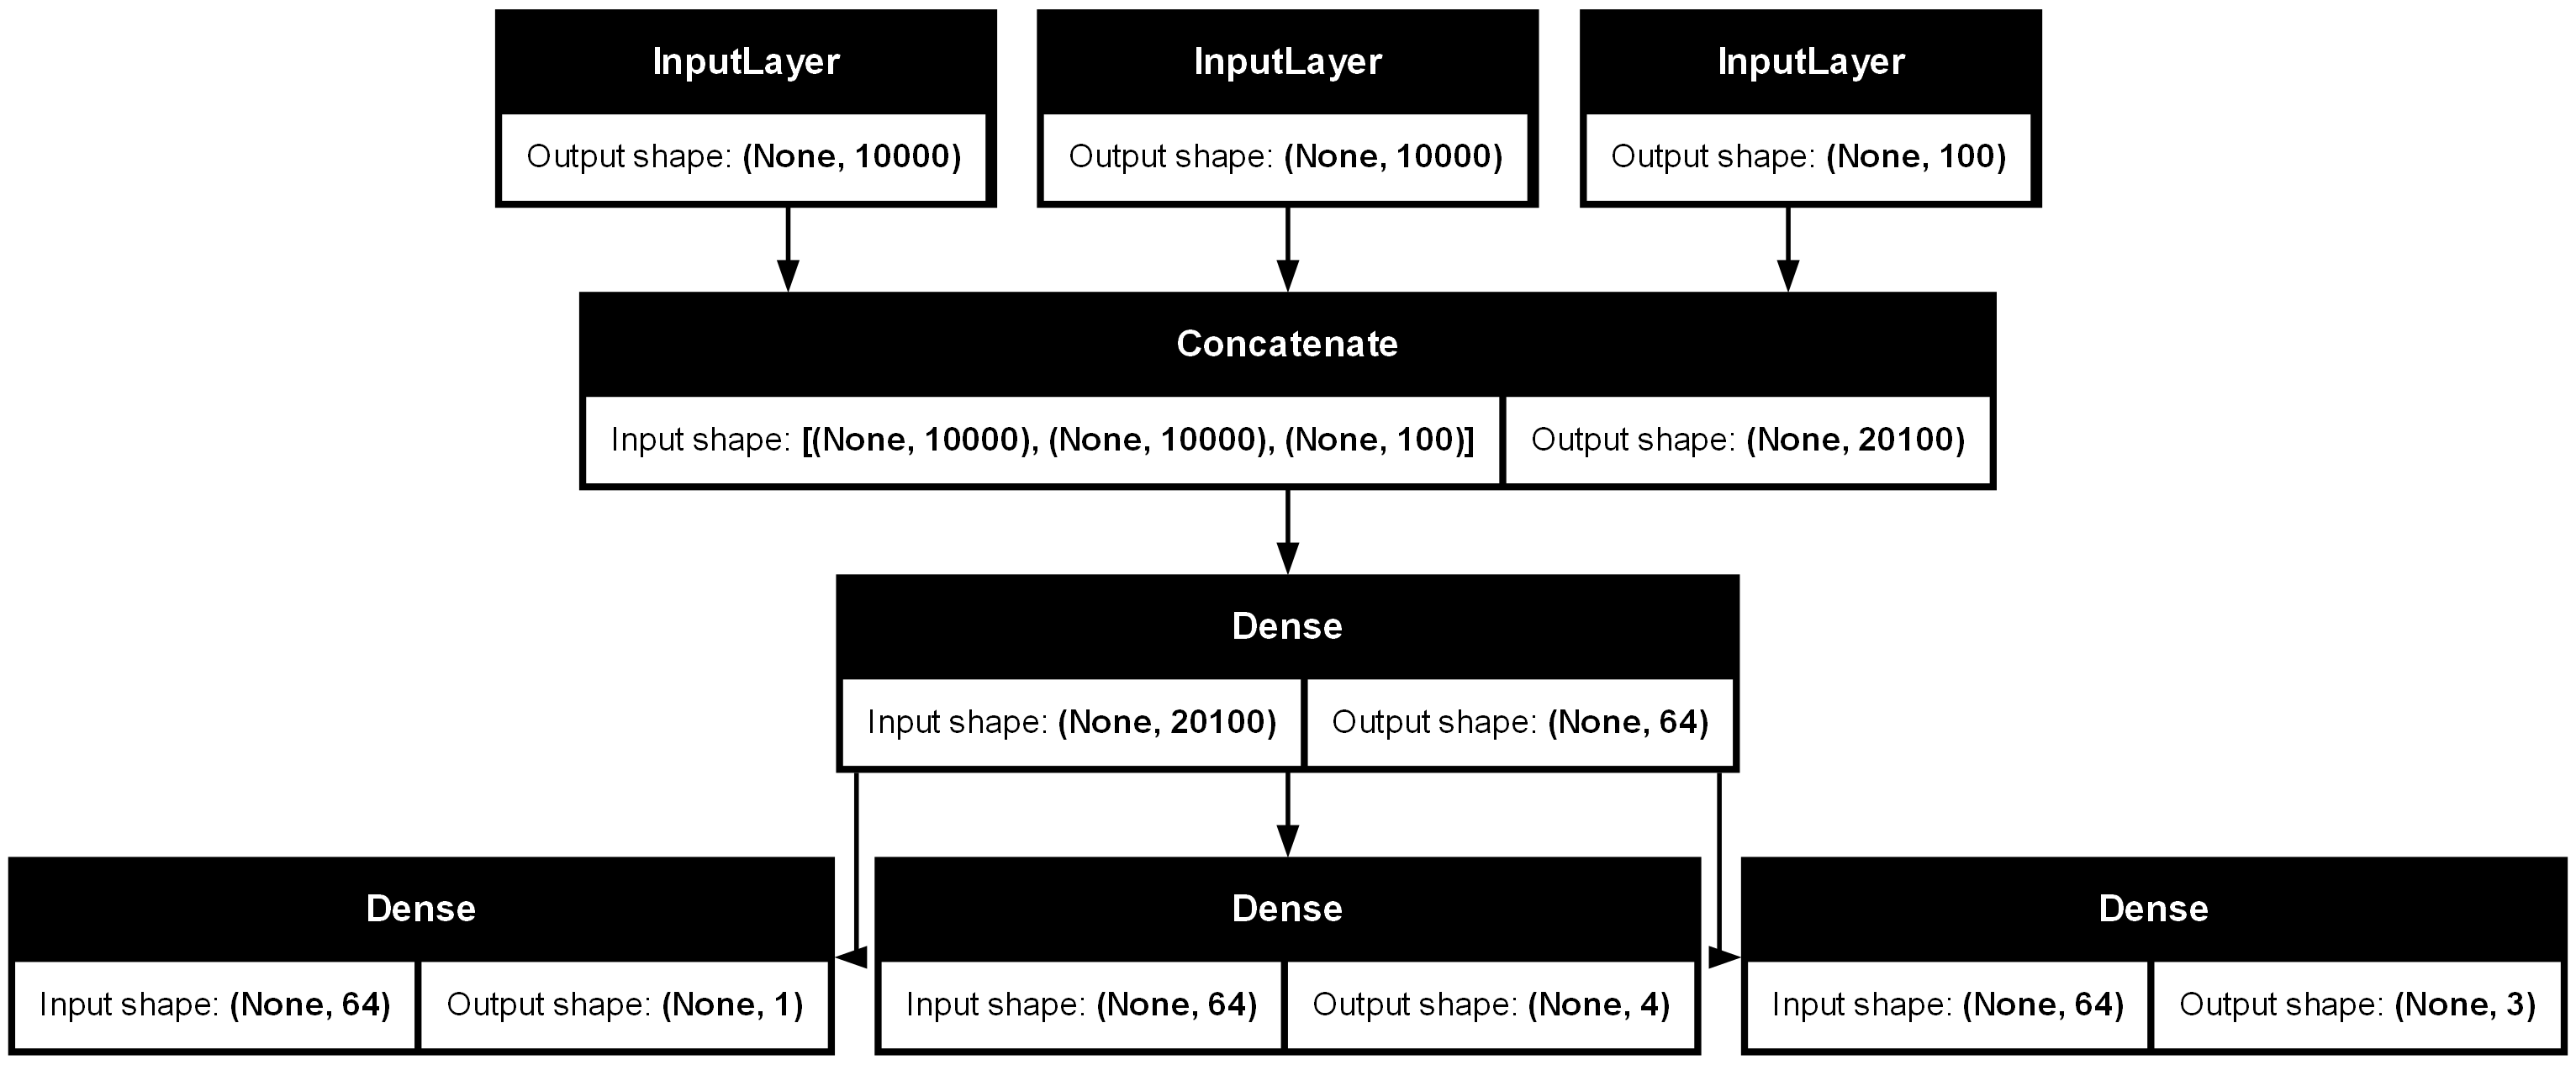

In [16]:
# 중간 층의 출력을 재사용해 새로운 모델 만들기 (추출된 특성을 재사용한다고 보면 됨)
# 이해안됨 다시 보기
# ex) Deep K-means algorithm

features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

# subclassing API

In [17]:
# 예제
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments): # 모델이 사용할 모든 레이어를 생성
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs): # forward pass를 정의
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [18]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [19]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2418 - loss: 36.6829 - mean_absolute_error: 0.4659
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1141 - loss: 43.0552 - mean_absolute_error: 0.4989 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


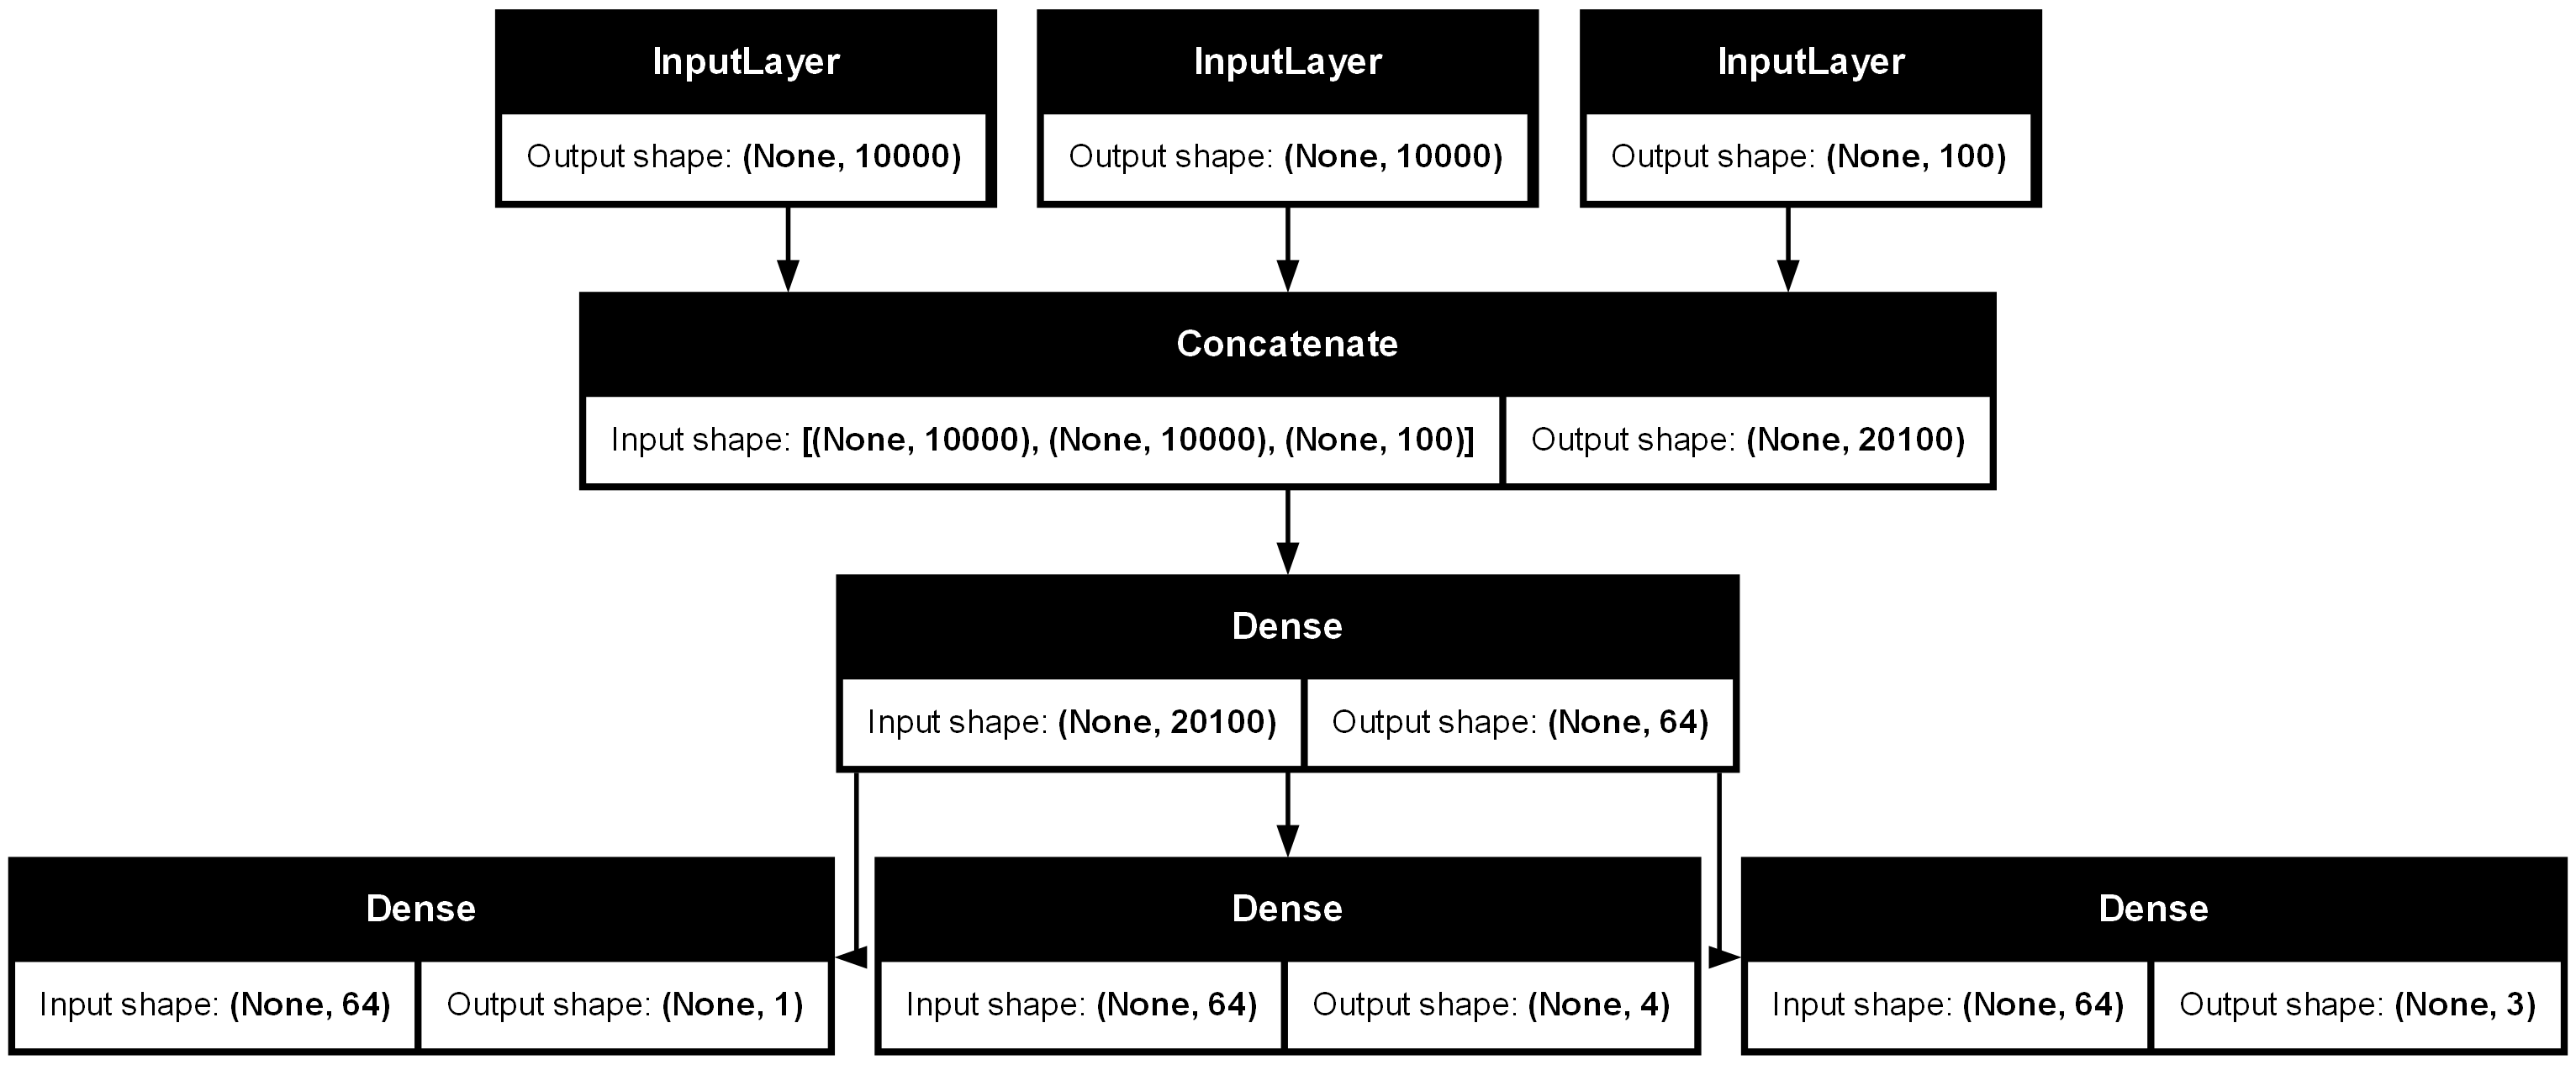

In [20]:
keras.utils.plot_model(new_model, "subclass_ticket_classifier.png", show_shapes=True)

In [21]:
# subclass는 유연하지만, 모델의 구조를 쉽게 이해하기 어려울 수 있음
# ex) 모델의 구조를 확인하려면 모델 인스턴스를 만들어야 함. summary() 메서드를 사용할 수 없음
# plot_model() 함수를 사용하면 모델 구조를 시각화할 수 없음?

# 여러 방식 혼합

In [22]:
# 서브클래싱한 모델을 포함하는 함수형 모델 만들기

class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [23]:
# 함수형 모델을 포함하는 서브클래싱 모델 만들기

inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

# 표준 워크플로: compile(), fit(), evaluate(), predict() 대신 사용자 정의 함수 만들어 쓰기

In [24]:
# 예시 (아직 정의 함수 안 쓴 것)
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8678 - loss: 0.4504 - val_accuracy: 0.9531 - val_loss: 0.1563
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9505 - loss: 0.1640 - val_accuracy: 0.9688 - val_loss: 0.1138
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9647 - loss: 0.1273 - val_accuracy: 0.9710 - val_loss: 0.1072
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9680 - loss: 0.1168
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


In [25]:
# Metric 클래스를 상속하여 사용자 정의 지표 구현하기

import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric): # keras.metrics.Metric 클래스를 상속 받아야 함 

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None): # 역전파로 업데이트 되지 않으므로 update_state 메서드를 구현해야 함? 
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self): # 현재 지표 값을 반환 
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self): # 객체를 생성하지 않고 상태를 초기화하는 방법을 제공해야 함 (지표 객체 하나를 서로 다른 훈련에 반복해서 사용하거나, 훈련과 평가에 모두 사용 가능) 
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [26]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8700 - loss: 0.4384 - rmse: 0.4341 - val_accuracy: 0.9563 - val_loss: 0.1422 - val_rmse: 0.2532
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9510 - loss: 0.1661 - rmse: 0.2718 - val_accuracy: 0.9682 - val_loss: 0.1092 - val_rmse: 0.2165
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9646 - loss: 0.1289 - rmse: 0.2351 - val_accuracy: 0.9699 - val_loss: 0.1073 - val_rmse: 0.2130
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9699 - loss: 0.1061 - rmse: 0.2129


In [27]:
# callback은 model.fit 과정에서 모델의 훈련을 제어하거나 모니터링하기 위해 사용되는 객체? 함수들인거 같음
# ex) 모델 체크포인트 저장, 조기 종료, 텐서보드 로그 기록 + 시각화 , 훈련하는 동안 하이퍼 파라미터 (학습률 등) 동적 조정 등
# keras.callbacks.ModelCheckpoint, keras.callbacks.EarlyStopping, keras.callbacks.TensorBoard, kakas.callbacks.LearningRateScheduler, keras.callbacks.CSVLogger 등이 있음
# callback은 keras.callbacks.Callback 클래스를 상속하여 사용자 정의 콜백을 만들 수 있음

# EarlyStopping 콜백과 ModelCheckpoint 콜백
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="./day14/checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.4534 - val_accuracy: 0.9607 - val_loss: 0.1387
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9495 - loss: 0.1697 - val_accuracy: 0.9665 - val_loss: 0.1252
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1309 - val_accuracy: 0.9720 - val_loss: 0.1080
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9685 - loss: 0.1101 - val_accuracy: 0.9737 - val_loss: 0.0997
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9717 - loss: 0.1044 - val_accuracy: 0.9763 - val_loss: 0.0908
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0919 - val_accuracy: 0.9762 - val_loss: 0.0897
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9754 - loss: 0.0844 - val_accuracy: 0.9788 - val_loss: 0.0891
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9771 - loss: 0.0802 - 

In [28]:
# 만들어진 모델을 불러오기 ? 에러는 이해안되는데 버전 문제일 수 있을 것 같음 
model = keras.models.load_model("./day14/checkpoint_path.keras")

ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.rmsprop.RMSprop object at 0x0000023893F52E70>:

'Unable to synchronously open object (unable to determine object type)'

List of objects that could not be loaded:
[<keras.src.optimizers.rmsprop.RMSprop object at 0x0000023893F52E70>]

In [29]:
# Callback 클래스를 상속하여 사용자 정의 콜백 만들기
# 내장 콜백에서 제공하지 않는 기능을 추가하거나, 훈련 중에 추가적인 동작을 수행하려는 경우 사용
# on_epoch_begin : 에포크가 시작될때 호출
# on_epoch_end : 에포크가 끝날 때 호출
# on_batch_begin : 배치 처리가 시작하기 전에 호출 
# on_batch_end : 배치 처리가 끝난 후에 호출
# on_train_begin : 훈련이 시작할때 호출
# on_train_end : 훈련이 끝날때 호출 
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8663 - loss: 0.4468 - val_accuracy: 0.9580 - val_loss: 0.1499
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9529 - loss: 0.1659 - val_accuracy: 0.9688 - val_loss: 0.1138
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9602 - loss: 0.1385 - val_accuracy: 0.9724 - val_loss: 0.0978
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9677 - loss: 0.1120 - val_accuracy: 0.9746 - val_loss: 0.0935
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9730 - loss: 0.1000 - val_accuracy: 0.9740 - val_loss: 0.1040
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9739 - loss: 0.0947 - val_accuracy: 0.9776 - val_loss: 0.0894
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9757 - loss: 0.0836 - val_accuracy: 0.9781 - val_loss: 0.0909
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0776 - 

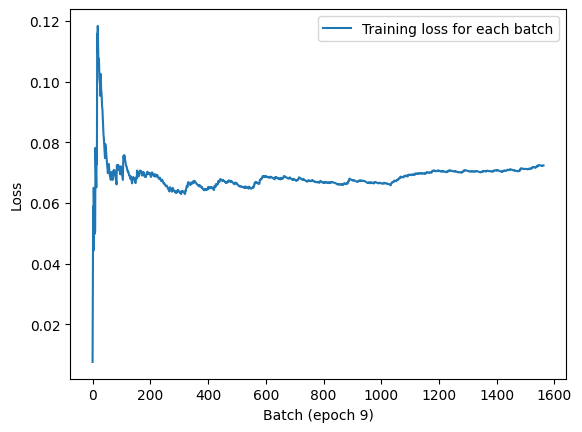

In [30]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

In [31]:
# 텐서보드를 사용한 모니터링과 시각화 예시
# 텐서보드 : https://www.tensorflow.org/tensorboard?hl=ko
import os

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 로그 디렉토리 생성
log_dir = "./day14/tb_logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# TensorBoard 콜백 정의
tensorboard = keras.callbacks.TensorBoard(
    log_dir=log_dir,
)

model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8662 - loss: 0.4489 - val_accuracy: 0.9603 - val_loss: 0.1451
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9523 - loss: 0.1592 - val_accuracy: 0.9688 - val_loss: 0.1134
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9619 - loss: 0.1324 - val_accuracy: 0.9745 - val_loss: 0.0945
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9681 - loss: 0.1159 - val_accuracy: 0.9753 - val_loss: 0.0923
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9723 - loss: 0.1031 - val_accuracy: 0.9768 - val_loss: 0.0961
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0931 - val_accuracy: 0.9774 - val_loss: 0.0902
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9773 - loss: 0.0900 - val_accuracy: 0.9804 - val_loss: 0.0854
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9775 - loss: 0.0841 - 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./day14/tb_logs

%reload_ext tensorboard
# VS code는 확장 프로그램에서 TensorBoard를 쓸 수도 있는 듯? 


# 사용자 정의 훈련, 평가 루프 만들기


In [32]:
# 내장 fit workflow 외의 원하는 것 구현하기 271p
# ex) gradient descent 직접 구현하기
# ex) 

# 훈련 vs 추론
# 측정 지표의 저수준 사용법

metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

# 리스트를 텐서로 변환
targets = tf.convert_to_tensor(targets)
predictions = tf.convert_to_tensor(predictions)

metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [33]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


In [39]:
# 단계별 훈련 루프 작성하기: 훈련 스텝 함수

model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [35]:
# 단계별 훈련 루프 작성하기: 지표 재설정

def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [36]:
# 단계별 훈련 루프 작성하기: 훈련 루프 자체

training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9147
...loss: 0.2915
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9526
...loss: 0.1639
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9644
...loss: 0.1307


In [37]:
# 단계별 평가 루프 작성하기

def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9677
...val_loss: 0.1194


In [38]:
# tf.function로 성능 높이기
# 평가 스텝 함수에 @tf.function 데코레이터 추가하기

@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9677
...val_loss: 0.1194


# fit() 메서드를 사용자 정의 훈련 루프로 활용하기


In [40]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

# 사용자 정의 모델 클래스
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [41]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4400
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1672
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1323


In [42]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [43]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
   1/1563 ━━━━━━━━━━━━━━━━━━━━ 5:28 210ms/step - sparse_categorical_accuracy: 0.1250 - loss: 0.1000

c:\Users\saink\PycharmProjects\aiffel\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:603: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight)`.
  warnings.warn(
c:\Users\saink\PycharmProjects\aiffel\.venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:578: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - sparse_categorical_accuracy: 0.8613 - loss: 0.1000
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - sparse_categorical_accuracy: 0.9528 - loss: 0.1000
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - sparse_categorical_accuracy: 0.9641 - loss: 0.1000


# playground 인사이트 기록

- Layer가 두단계를 넘어가면 6개일때랑 크게 차이가 없었음

- Relu > sigmoid > tanh 계산 속도

- learning rate 다르게 하면 값이 달라짐

- epoch이 낮을때는 sigmoid 외에는 좋은 효과를 내기 힘들었다. dropout이 있어도 크게 달라지지 않았다

- layer가 넓을 수록 빠르게 수렴됨

- layer 층 3개가 넘어가면 sigmoid의 한계가 보이기 시작, 역전파가 느리게 됨.  loss가 꺽이는 지점이 있음 버려지는 path가 존재 = pruning이 어디가 되는지 알 수 있었음

- 버려지는 path가 존재한다는 것은 잘 안 쓰이는 feature가 있지 않을까? L1을 사용하니 차원축소가 되며 성능이 높아졌음

- convolution layer 층이 깊어지면, 앞에서는 단순한 패턴, 뒤에서는 복잡한 패턴을 학습하기 시작

- 복잡한 데이터가 아니라면 conv, dense를 무작정 늘리지 않는게 성능에 도움이 됨 = 과적합됨, dense를 쓰게되면 지역적 정보가 손상됨 

# 회고

- 배운 점 : 실험 전에 조사한 사람들은 본받아서 선행 조사를 항상 먼저 해야겠다

- 아쉬운점 : 혼자 발표 시간을 너무 많이 쓴거 같다 5분이 길지 않구만!

- 느낀 점 : 코드로 실험한 사람들은 시간이 부족했을텐데 대단한거 같다

- 어려웠던 점 : 7장 후반부에 직접 만드는 부분
